<a href="https://colab.research.google.com/github/DevashishX/AbstractClustering/blob/master/templates/KmeansGPUGlovePmeans5_Colab_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Requirements

This file has been modified for colab training, all outputs are stored in *ColabOutput* folder in your google drive, there is also a one copy in the normal training folders as well.
*Make sure you have ColabOutput folder in your google drive*

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!git clone https://github.com/DevashishX/AbstractClustering.git; 
!cp -r AbstractClustering/* ./.

Cloning into 'AbstractClustering'...
remote: Enumerating objects: 741, done.
remote: Total 741 (delta 0), reused 0 (delta 0), pack-reused 741
Receiving objects: 100% (741/741), 765.35 MiB | 37.07 MiB/s, done.
Resolving deltas: 100% (374/374), done.
Checking out files: 100% (439/439), done.


In [0]:
import subprocess
print((subprocess.check_output("lscpu", shell=True).strip()).decode())

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2200.000
BogoMIPS:            4400.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

# Installing GPU Kmeans
https://github.com/src-d/kmcuda

In [0]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Sat Apr 18 11:57:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+

In [0]:
%%time
# Install RAPIDS
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 89 (delta 19), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (89/89), done.
PLEASE READ
********************************************************************************************************
Changes:
1. Now that most people have migrated, we have rem0ved the migration notice.
2. default stable version is now 0.13.  Nightly is now 0.14
3. You can now declare your RAPIDS version as a CLI option and skip the user prompts (ex: '0.13' or '0.14', between 0.11 to 0.14, without the quotes): 
        "!bash rapidsai-csp-utils/colab/rapids-colab.sh <version/label>"
        Examples: '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.13', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh stable', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh s'
                  '!bash rapidsai-csp-utils/colab/ra

In [0]:
print("RAPIDS INSTALLED")

Installations Over

Using this library: https://github.com/src-d/kmcuda

# ***Set parameters***

In [0]:
# !cp -r /content/drive/My\ Drive/ColabOutput/FTXSentEmbs ./FTXSentEmbs

In [0]:
# !cp -r /content/drive/My\ Drive/ColabOutput/W2VSentEmbs ./W2VSentEmbs

In [0]:
__algo__ = "KMEANS_GPU"               #Name of the Clustering algorithm
__emb__ = "w2v"                 #Name of the Word Embeddings used (glove, w2v, ftt), MUST set directory below
__sentemb__ = "pmeans5"           #Name of Sentence Embedding algorithm used
recnum = 3000                     #Number of records to be read from files
k = 50                           #Number of Clusters
usesqrt = False                   #Set value of k to sqrt of recnum, overrides k
randomsample = True              #Random Sampling to be True/False for records which are read
embedDir = "./W2VSentEmbs/"     #Directory where embeddings are saved for that selected embedding
modelDir = "./models/"           #Directory where models are saved
megadfDir = "./MegaDfs/"         #Directory Where Megadf is to be saved
plotDir = "./plots/"             #Directory where plots are saved
metadataDir = "./modelMetaData/" #Directory where performance and distribution params are to be stored
dumpDir = "./dump/"              #Directory where test outcomes are saved



# Actual Code

### imports and time

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import os, subprocess, sys
import datetime, time
import pickle


import cudf
import cupy
from cuml.cluster import KMeans as cuKMeans

### File Settings

In [0]:
oldlist = os.listdir(embedDir)
filelist = sorted([embedDir+f for f in oldlist if f[-3:]=="pkl"])
filenum = len(filelist)
smalllist = filelist[:filenum]
print("Length of Smalllist: ", len(smalllist))

Length of Smalllist:  116


### Number of Records
It is Recommended to Set this at the top parameters

In [0]:
recnum = recnum

### Read all the pandas dataframes

In [0]:
%%time
megadf = pd.DataFrame()

if randomsample == True:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        megadf = megadf.append(tempdf, ignore_index = True)
    megadf = megadf.sample(recnum, random_state=42)
else:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        megadf = megadf.append(tempdf, ignore_index = True)
        if megadf.shape[0] >= recnum:
            megadf = megadf[:recnum]
            break

print("megadf.shape: ", megadf.shape)

randomsample:  True
megadf.shape:  (3000, 3)
CPU times: user 1.67 s, sys: 451 ms, total: 2.12 s
Wall time: 2.12 s


In [0]:
predata = megadf["embedding"]
data = np.matrix(predata.to_list())
print(data.shape)

(3000, 500)


### Number of Clusters
It is Recommended to Set this at the top parameters

In [0]:
if usesqrt == True:
    print("usesqrt: ", usesqrt)
    sqrt_k = int(np.sqrt(data.shape[0]))
    k = int(sqrt_k)
else:
    print("usesqrt: ", usesqrt)
    k = k
print("k: ", k)

usesqrt:  False
k:  50


## Clustering
Please modify the functions here to change algorithm

In [0]:
device_data=data

In [0]:
%%time

print("Starting Clustering Process")
start_time = time.time()
# model = cluster.KMeans(n_clusters=k, n_init = 20, max_iter=1000, verbose=1, n_jobs=-1)
model = cuKMeans(init="k-means||",
                       max_iter=1000,
                       n_init = 20,
                       n_clusters=k,
                       oversampling_factor=40,
                       random_state=42,
                       verbose = True)

model.fit(device_data)
end_time = time.time()
timetrain = round(end_time-start_time, 2)
print("done! {}".format(timetrain))
print("kmeans_cuda.fit(data) Done!")

Starting Clustering Process
done! 1.86
kmeans_cuda.fit(data) Done!
CPU times: user 1.18 s, sys: 671 ms, total: 1.85 s
Wall time: 1.86 s


### Saving the output data into vars

In [0]:
centroids = model.cluster_centers_.tolist()
labels = model.labels_.tolist()
megadf["clusterlabel"]=labels
centroidDF = pd.DataFrame(centroids)


In [0]:
display(megadf)
display(centroidDF)

,id,title,embedding,clusterlabel
267625,1586358,Health professionals and ethnic Pakistanis in ...,"[-0.23460150424249232, 0.0452263151453913, 0.1...",14
132693,1514579,Web Analysis and Design - Build,"[-0.2338199993595481, 0.06889000236988067, 0.3...",33
42457,1352013,The host of GRB 060206 : kinematics of a dista...,"[-0.3636138595889627, -0.00375247595942404, 0....",30
11052,9050181,Postexercise Muscle Glycogen Synthesis with Co...,"[-0.3255062072056121, 0.044269654580496316, 0....",10
13984,397771,Development of a mixed boundary environment fo...,"[-0.3134369851689633, 0.04537123375355381, 0.2...",29
...,...,...,...,...
252679,225737,New classical macroeconomic theory and fiscal ...,"[-0.33525263219091456, 0.0907499992631768, 0.1...",48
211723,7431518,The Headrow Telephone Repair Shelter,"[-0.19169523833053453, -0.10590952364284367, 0...",2
39594,46685,High-frequency performance of Schottky source/...,"[-0.3285880007222295, -0.0497380006685853, 0.2...",32
15617,2709463,The Role of Object-Dependent Content in Psycho...,"[-0.17272745032666945, -0.034047059997843174, ...",44


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,-0.203203,0.062585,0.001422,-0.134986,0.237792,0.059779,-0.288989,-0.245477,0.185276,-0.140423,0.528979,-0.089009,0.066407,0.107752,0.370822,0.262865,0.265784,-0.169328,0.176791,0.151283,-0.082319,0.111325,0.114041,-0.100113,0.065797,-0.036597,0.014870,-0.070535,0.097815,0.099713,0.522591,0.119483,-0.046632,-0.010870,0.151894,0.154685,-0.076845,-0.199074,-0.011361,-0.120070,...,0.344416,0.400289,0.386169,0.342701,0.303285,0.647868,0.401748,0.330877,0.304329,0.402319,0.661468,0.466278,0.303850,0.397368,0.357530,0.352922,0.448334,0.419477,0.341552,0.419986,0.682652,0.383098,0.410243,0.378451,0.404771,0.603649,0.380016,0.343946,0.351642,0.340600,0.355559,0.332048,0.615410,0.384892,0.444454,0.481971,0.287090,0.311250,0.316714,0.445290
1,-0.249423,0.099444,0.204109,-0.032860,0.173125,-0.282921,-0.086925,-0.070215,0.093735,-0.078705,0.288912,0.168617,0.232134,0.090733,0.169830,0.408964,0.103804,-0.269720,0.231218,0.207003,0.125895,0.348054,0.199085,-0.081468,0.133858,0.023677,0.009991,0.147384,0.066141,0.145997,0.408906,0.291340,0.099165,-0.078314,0.224159,0.222689,-0.042994,-0.085814,0.158617,0.056859,...,0.289762,0.296253,0.484832,0.370105,0.352674,0.475096,0.341725,0.373039,0.320640,0.340781,0.546435,0.346506,0.308900,0.358739,0.353457,0.398937,0.341880,0.312246,0.372805,0.329143,0.393943,0.434567,0.324787,0.408204,0.423587,0.364516,0.391558,0.426979,0.429802,0.319702,0.346899,0.294103,0.369573,0.409764,0.558760,0.419444,0.326225,0.351967,0.317646,0.396061
2,-0.173038,-0.038761,0.080851,-0.082719,0.290299,-0.039626,-0.309833,-0.058541,0.049343,0.033954,0.278448,0.155756,0.232478,0.177868,0.321222,0.395155,0.062550,-0.225871,0.105484,0.073354,-0.023515,0.172625,0.265737,-0.054208,0.163695,0.109532,0.006530,0.108723,-0.078194,0.256552,0.341748,0.125438,0.227704,-0.071050,0.304957,0.250144,-0.071279,-0.131691,0.165997,0.052387,...,0.301396,0.339822,0.395380,0.288466,0.317395,0.562516,0.315340,0.343884,0.331652,0.325082,0.560517,0.360736,0.330405,0.310825,0.385397,0.361340,0.314994,0.320234,0.326636,0.342797,0.431341,0.344486,0.337415,0.385788,0.304059,0.412820,0.389415,0.373174,0.371212,0.333804,0.410899,0.376060,0.318623,0.371442,0.435002,0.312967,0.324153,0.348227,0.364971,0.349665
3,-0.286728,0.094462,0.225851,-0.012173,0.152338,-0.280089,-0.113523,-0.109344,0.034451,-0.138364,0.291702,0.195934,0.280804,0.089492,0.139400,0.275478,0.110158,-0.320658,0.175968,0.209590,0.065114,0.342361,0.213247,-0.085554,0.123805,-0.022278,0.016227,0.174709,0.033995,0.148113,0.474040,0.269063,0.059823,-0.051543,0.374752,0.206696,-0.057235,-0.120781,0.092913,0.052104,...,0.282380,0.288301,0.466701,0.388349,0.346498,0.467640,0.348604,0.413697,0.315449,0.343252,0.498003,0.363258,0.293695,0.398997,0.349434,0.352955,0.386432,0.313136,0.358218,0.318470,0.399512,0.386416,0.326582,0.425554,0.369471,0.358943,0.399826,0.462363,0.450703,0.319938,0.363537,0.304066,0.342724,0.362733,0.460870,0.352355,0.310934,0.336595,0.315734,0.498496
4,-0.239954,0.077904,0.208623,0.010416,0.203479,-0.166118,-0.175148,-0.155897,0.062186,-0.182865,0.336611,0.038279,0.169893,0.146929,0.184059,0.367344,0.154261,-0.207686,0.179346,0.182258,0.109800,0.280114,0.194331,-0.100060,0.042761,0.017898,0.027068,0.016735,0.014051,0.072044,0.481710,0.109723,0.109691,-0.065799,0.292598,0.157903,-0.001972,-0.110561,0.025206,0.016696,...,0.294512,0.331109,0.481996,0.331466,0.349423,0.523453,0.347430,0.409128,0.327800,0.335007,0.587367,0.375426,0.312028,0.339547,0.378317,0.327286,0.362197,0.382248,0.353995,0.345963,0.482964,0.424944,0.362048,0.404576,0.341186,0.385727,0.407549,0.374739,0.351718,0.313390,0.424279,0.329919,0.379341,0.363302,0.489422,0.417595,0.335060,0.348181,0.350240,0.463075
5,-0.364209,0.006912,0.228647,-0

## Plotting

Text(0.5, 1.0, 'KMEANS_GPU with k=50 records=3000 features=500 using w2v')

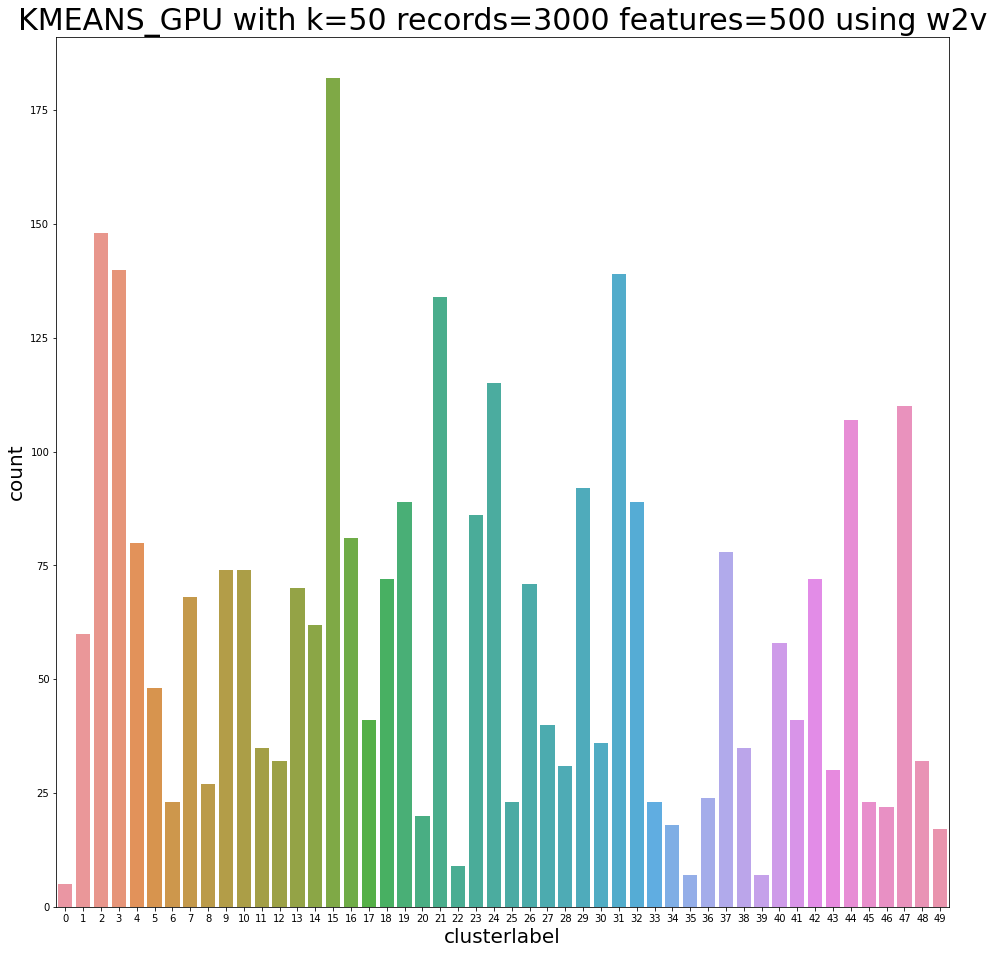

In [0]:
plt.figure(figsize=(16,16))
titlestring = "{} with k={} records={} features={} using {}".format(__algo__, k, data.shape[0], data.shape[1], __emb__)
snsplot = sns.countplot("clusterlabel", data=megadf)
snsplot.xaxis.label.set_size(20)
snsplot.yaxis.label.set_size(20)
plt.title(
        titlestring,
        fontdict = {'fontsize' : 30}
    )

### *Name given to saved files*

In [0]:
features = data.shape[1]
records = data.shape[0]
name = "{}_{}_{}_K{}_R{}_F{}".format(__algo__, __emb__, __sentemb__, k, records, features)
name

'KMEANS_GPU_w2v_pmeans5_K50_R3000_F500'

### Saving Data

Save model

In [0]:
modelname = "{}_model.pkl".format(name)
pickle.dump(model, open(modelDir + modelname, 'wb'))
os.environ["SAVE_DF"] = modelDir + modelname
!cp $SAVE_DF ./drive/My\ Drive/ColabOutput/.

Save Plot

In [0]:
snspltname = "{}_plt.png".format(name)
snsplot.figure.savefig(plotDir + snspltname)
os.environ["SAVE_DF"] = plotDir + snspltname
!cp $SAVE_DF ./drive/My\ Drive/ColabOutput/.

Save Megadf

In [0]:
clusterdfname = "{}_clustered_megadf.pkl".format(name)
megadf.to_pickle(megadfDir + clusterdfname)
os.environ["SAVE_DF"] = megadfDir + clusterdfname
!cp $SAVE_DF ./drive/My\ Drive/ColabOutput/.

Save Centroids

In [0]:
centroidDF = pd.DataFrame(centroids)
centroidDFname = "{}_centroids.pkl".format(name)
centroidDF.to_pickle(megadfDir + centroidDFname)
os.environ["SAVE_DF"] = megadfDir + centroidDFname
!cp $SAVE_DF ./drive/My\ Drive/ColabOutput/.
print(centroidDF.shape)

(50, 500)


#### Open dataframe to test

In [0]:
sub = megadf.loc[:, :]
sub.tail()

,id,title,embedding,clusterlabel
252679,225737,New classical macroeconomic theory and fiscal ...,"[-0.33525263219091456, 0.0907499992631768, 0.1...",48
211723,7431518,The Headrow Telephone Repair Shelter,"[-0.19169523833053453, -0.10590952364284367, 0...",2
39594,46685,High-frequency performance of Schottky source/...,"[-0.3285880007222295, -0.0497380006685853, 0.2...",32
15617,2709463,The Role of Object-Dependent Content in Psycho...,"[-0.17272745032666945, -0.034047059997843174, ...",44
273882,75243,Do it like a robot,"[-0.22579285369387694, -0.058478570343660455, ...",42


In [0]:
megadf.columns

Index(['id', 'title', 'embedding', 'clusterlabel'], dtype='object')

# Performance Testing and Distribution


In [0]:
metadata = pd.DataFrame(columns=["Name", "Algo", "WordEmb", "SentEmb", "K", "R", "F", "SS", "CSavg", "CSmin", "CSmax", "T2Pavg", "T2LM", "T2LMP", "MEM"])

In [0]:
metadict = {
    "Name":None,                     #Name of the save file prefix
    "Algo":None,                     #Name of the Clustering algorithm
    "WordEmb":None,                  #Name of the Word Embeddings used (glove, w2v, ftt)
    "SentEmb":None,                  #Name of Sentence Embedding algorithm used 
    "K":None, "R":None, "F":None,    #Number of clusters, records and fetures
    "T2T":None,                      #Time required to train model
    "SS":None,                       #Silhoutte Score
    "DBS":None,                      #Davis Bouldin Score
    "CSavg":None,                    #Average Cluster Size
    "CSmin":None,                    #Minimum Cluster Size
    "CSmax":None,                    #Maximum Cluster Size
    "T2Pavg":None,                   #Average Time To Predict cluster of one record
    "T2LM":None,                     #Average Time to Load Model
    "T2LMP":None,                    #Amortized time to Predict after loading the model
    "MEM":None                      #Memory used by the Model
    }
metadict

{'Algo': None,
 'CSavg': None,
 'CSmax': None,
 'CSmin': None,
 'DBS': None,
 'F': None,
 'K': None,
 'MEM': None,
 'Name': None,
 'R': None,
 'SS': None,
 'SentEmb': None,
 'T2LM': None,
 'T2LMP': None,
 'T2Pavg': None,
 'T2T': None,
 'WordEmb': None}

In [0]:
metadict["Name"]=name
metadict["Algo"]=__algo__
metadict["WordEmb"]=__emb__
metadict["SentEmb"]=__sentemb__
metadict["K"]=k
metadict["R"]=recnum
metadict["F"]=features
metadict

{'Algo': 'KMEANS_GPU',
 'CSavg': None,
 'CSmax': None,
 'CSmin': None,
 'DBS': None,
 'F': 500,
 'K': 50,
 'MEM': None,
 'Name': 'KMEANS_GPU_w2v_pmeans5_K50_R3000_F500',
 'R': 3000,
 'SS': None,
 'SentEmb': 'pmeans5',
 'T2LM': None,
 'T2LMP': None,
 'T2Pavg': None,
 'T2T': None,
 'WordEmb': 'w2v'}

#### Time to train

In [0]:
metadict["T2T"]=timetrain

#### Scores

In [0]:
ss = silhouette_score(data, labels, metric = 'euclidean')
dbs = davies_bouldin_score(data, labels)
metadict["SS"]=ss
metadict["DBS"]=dbs

#### Cluster Size

In [0]:
clusterdata = megadf.groupby("clusterlabel", as_index=True).size().reset_index(name="count")
clusterdata.head()

,clusterlabel,count
0,0,5
1,1,60
2,2,148
3,3,140
4,4,80


In [0]:
clusterdfname = "{}_clustered_counts.pkl".format(name)
clusterdata.to_pickle(megadfDir + clusterdfname)
os.environ["SAVE_DF"] = megadfDir + clusterdfname
!cp $SAVE_DF ./drive/My\ Drive/ColabOutput/.

In [0]:
countdata = clusterdata.groupby("count").size().reset_index(name="clusters")
display(countdata.head(3))
display(countdata.tail(3))

,count,clusters
0,5,1
1,7,2
2,9,1


,count,clusters
37,140,1
38,148,1
39,182,1


In [0]:
metadict["CSmax"] = max(clusterdata["count"])
metadict["CSmin"] = min(clusterdata["count"])
metadict["CSavg"] = np.mean(clusterdata["count"])

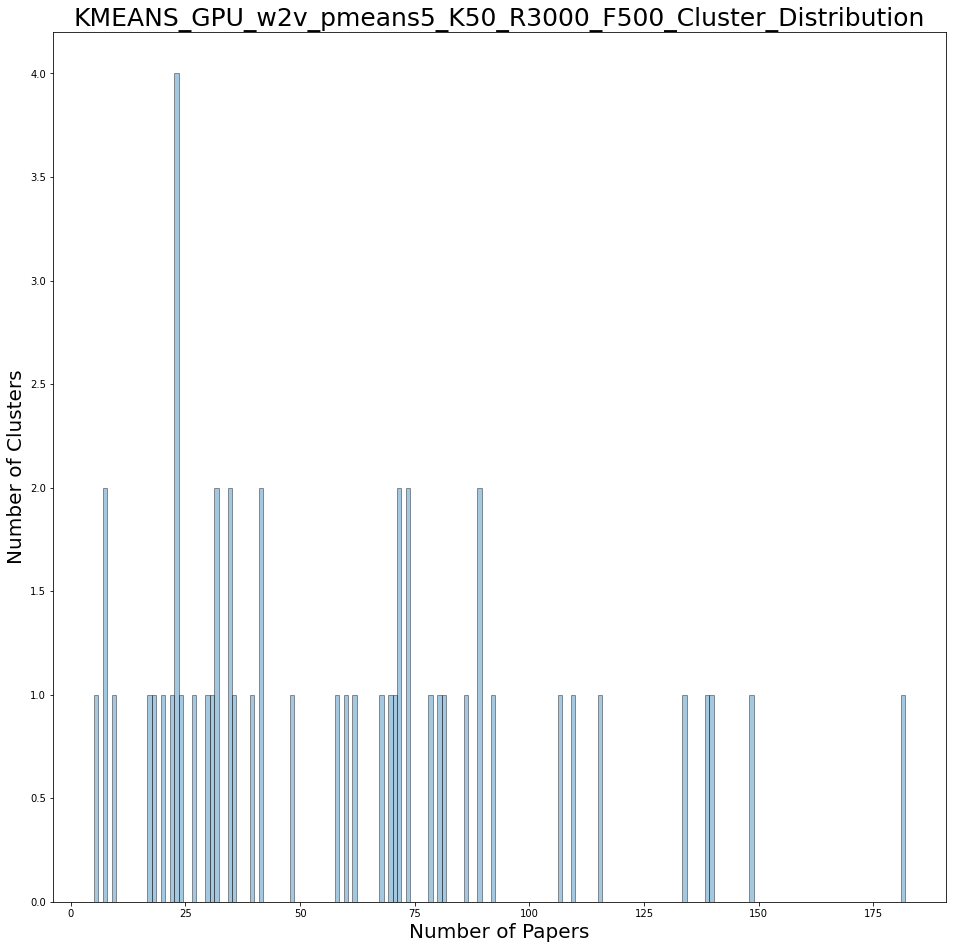

In [0]:
%matplotlib inline
plt.figure(figsize=(16,16))

sns.axes_style("whitegrid", {"axes.grid":True, 
                            'axes.spines.left': False,
                             'axes.spines.bottom': False,
                             'axes.spines.right': False,
                             'axes.spines.top': False})


titlestring = "{}_Cluster_Distribution".format(name)
snsplot = sns.distplot(clusterdata["count"], 
                       kde=False, 
                       bins=max(clusterdata["count"]),
                      hist_kws={'edgecolor':'black'},)
snsplot.set(xlabel="Number of Papers", ylabel="Number of Clusters")
snsplot.xaxis.label.set_size(20)
snsplot.yaxis.label.set_size(20)
plt.title(
        titlestring,
        fontdict = {'fontsize' : 25}
    )
plt.show()



In [0]:
snspltname = "{}_Cluster_Distribution.png".format(name)
snsplot.figure.savefig(plotDir + snspltname)
os.environ["SAVE_DF"] = plotDir + snspltname
!cp $SAVE_DF ./drive/My\ Drive/ColabOutput/.

#### Prediction Time Performance

In [0]:
testdf = pd.DataFrame()
if recnum < 2000:
    samplenum = int(recnum / 10)
else:
    samplenum = 2000

for f in smalllist:
    tempdf = pd.read_pickle(f)
    testdf = megadf.append(tempdf, ignore_index = True, sort = False)
testdf = testdf.sample(samplenum, random_state=int(time.time()%100000))
predata = testdf["embedding"]
data = np.matrix(predata.to_list())
print(data.shape)

(2000, 500)


In [0]:
print("Starting Predicting Performance")
testmodel = model
start_time = time.time()
for d in data:
    lb = testmodel.predict(d)
end_time = time.time()
timetest = end_time-start_time
avgtime = timetest/data.shape[0]
print("Avgtime: {} Totaltime: {}".format(avgtime, timetest))
metadict["T2Pavg"]=avgtime

Starting Predicting Performance
Avgtime: 0.0004080890417098999 Totaltime: 0.8161780834197998


In [0]:
print("Starting Loading Performance")
loadruns = 50
start_time = time.time()
for i in range(loadruns):
    testmodel = pickle.load(open(modelDir + modelname, 'rb'))
end_time = time.time()
timetest = end_time-start_time
avgtime = timetest/loadruns
print("Avgtime: {} Totaltime: {}".format(avgtime, timetest))
metadict["T2LM"] = avgtime
avgtime

Starting Loading Performance
Avgtime: 0.0003612089157104492 Totaltime: 0.01806044578552246


0.0003612089157104492

In [0]:
print("Starting Amortized Performance")
loadruns = 5
avglist = []

for i in range(loadruns):
    start_time = time.time()
    testmodel = pickle.load(open(modelDir + modelname, 'rb'))
    for d in data:
        lb = testmodel.predict(d)
    end_time = time.time()
    timetest = (end_time-start_time)/data.shape[0]
    avglist.append(timetest)

timetest = np.sum(avglist)
avgtime = np.mean(avglist)
print("Avgtime: {} Totaltime: {}".format(avgtime, timetest))
metadict["T2LMP"] = avgtime
avgtime

Starting Amortized Performance
Avgtime: 0.00041021668910980224 Totaltime: 0.0020510834455490113


0.00041021668910980224

In [0]:
modelsize = sys.getsizeof(pickle.dumps(model))
print("modelsize:", modelsize, "bytes")
metadict["MEM"]=modelsize

modelsize: 200921 bytes


In [0]:
metadict

{'Algo': 'KMEANS_GPU',
 'CSavg': 60.0,
 'CSmax': 182,
 'CSmin': 5,
 'DBS': 3.1705931542498877,
 'F': 500,
 'K': 50,
 'MEM': 200921,
 'Name': 'KMEANS_GPU_w2v_pmeans5_K50_R3000_F500',
 'R': 3000,
 'SS': 0.0596771063355551,
 'SentEmb': 'pmeans5',
 'T2LM': 0.0003612089157104492,
 'T2LMP': 0.00041021668910980224,
 'T2Pavg': 0.0004080890417098999,
 'T2T': 1.86,
 'WordEmb': 'w2v'}

In [0]:
metadata = metadata.append(metadict, ignore_index=True)
metadata

,Name,Algo,WordEmb,SentEmb,K,R,F,SS,CSavg,CSmin,CSmax,T2Pavg,T2LM,T2LMP,MEM,DBS,T2T
0,KMEANS_GPU_w2v_pmeans5_K50_R3000_F500,KMEANS_GPU,w2v,pmeans5,50,3000,500,0.059677,60.0,5,182,0.000408,0.000361,0.00041,200921,3.170593,1.86


In [0]:
metadataname = "{}_metadata.pkl".format(name)
metadata.to_pickle(metadataDir + metadataname)
os.environ["SAVE_DF"] = metadataDir + metadataname
!cp $SAVE_DF ./drive/My\ Drive/ColabOutput/.

In [0]:
print(name)
print("All Done!\nCheck ColabOutput!")

KMEANS_GPU_w2v_pmeans5_K50_R3000_F500
All Done!
Check ColabOutput!
